In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, roc_curve, auc
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LogNorm

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score



### Plot functions

In [17]:
def plot_confusion_matrix(y_true, y_pred, rute):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a figure and axes
    plt.figure(figsize=(6, 4))
    im = plt.imshow(cm, interpolation='nearest', cmap='Blues', norm=LogNorm(vmin=cm.min(), vmax=cm.max()))
    plt.colorbar(im, format='%d')  # Display actual values in the color bar
    
    # Add labels to the plot
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    
    # Add values to each cell
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if cm[i, j] < np.max(cm) * 0.5 else "white")
    
    # Add axes labels
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Save the plot 
    plt.savefig(rute, dpi=300 , bbox_inches='tight')
    # Show the plot
    plt.show()

In [18]:
def plot_roc_curve(y_true, y_scores, rute):
    # Compute the false positive rate, true positive rate, and threshold values
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Create the ROC curve plot
    plt.figure()
    plt.plot(fpr, tpr, color='#0072B2', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='#cc3c34', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

    # Save the plot 
    plt.savefig(rute, dpi=300 , bbox_inches='tight')
    
    plt.show()

## Load data

In [19]:
df_encoded = pd.read_csv("data/encoded_data.csv", sep="\t")
df = pd.read_csv("data/combined_dataframe_clean.csv", sep="\t")

## Split dataframe

In [20]:
X_train_GP, X_test_GP, y_train_GP, y_test_GP = train_test_split(df_encoded, df['GoodPitStop'], test_size=0.3, random_state=4815)
X_train_HP, X_test_HP, y_train_HP, y_test_HP = train_test_split(df_encoded, df['HasPitLap'], test_size=0.3, random_state=4815)

# Random forest

### Has pit lap

In [21]:
rf_HasPit = RandomForestClassifier(class_weight="balanced", max_depth= None, min_samples_split=10, n_estimators=100)
rf_HasPit.fit(X_train_HP, y_train_HP)
y_pred_HP = rf_HasPit.predict(X_test_HP)

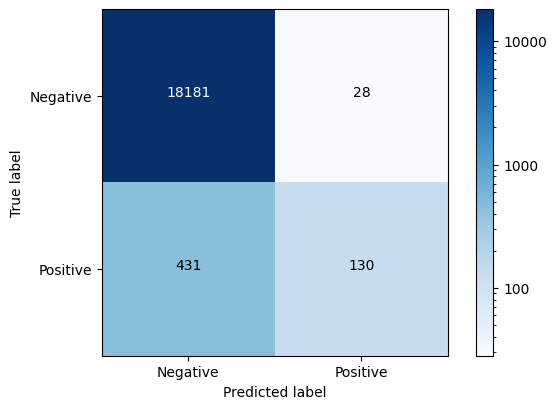

In [22]:
plot_confusion_matrix(y_test_HP, y_pred_HP, "img/results/Matrix_RF_HP.png")


In [23]:
print(metrics.confusion_matrix(y_test_HP,y_pred_HP))
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_HP,y_pred_HP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_HP,y_pred_HP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_HP,y_pred_HP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_HP,y_pred_HP),3)))

[[18181    28]
 [  431   130]]
Accuracy : 0.976
Precision : 0.823
Recall : 0.232
F1 : 0.362


In [24]:
y_train_HP_pred = rf_HasPit.predict(X_train_HP)
training_error = 1 - accuracy_score(y_train_HP, y_train_HP_pred)
validation_error = 1 - accuracy_score(y_test_HP, y_pred_HP)

print ('Training error: ' + str(training_error))
print ('Validation error: ' + str(validation_error))

Training error: 0.00047949584436934867
Validation error: 0.024453915823121952


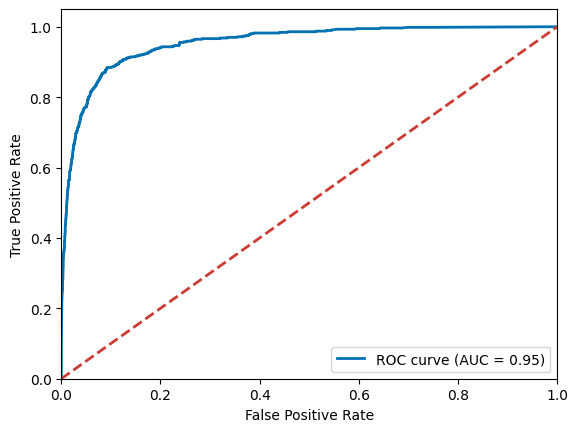

In [25]:
# Get the predicted probabilities for the positive class
y_scores_HP = rf_HasPit.predict_proba(X_test_HP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_HP, y_scores_HP, "img/results/ROC_RF_HP.png")

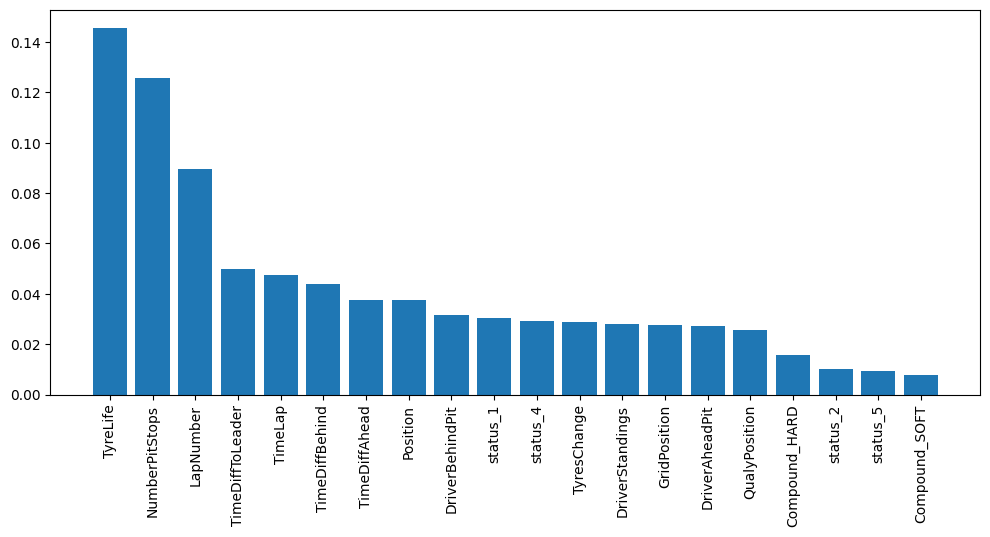

In [26]:
# Get feature importances
importances = rf_HasPit.feature_importances_
indices = np.argsort(importances)[::-1]


# Set number of features to plot
num_features = 20

# Plot feature importances for the top num_features
plt.figure(figsize=(12, 5))
plt.bar(range(num_features), importances[indices][:num_features])
plt.xticks(range(num_features), X_train_HP.columns[indices][:num_features], rotation=90)
plt.savefig("img/results/topFeaturesHP", dpi=300 , bbox_inches='tight')
plt.show()

### Good pit

In [27]:
rf_GoodPit = RandomForestClassifier(class_weight="balanced", max_depth= None, min_samples_split=10, n_estimators=100)
rf_GoodPit.fit(X_train_GP, y_train_GP)
y_pred_GP = rf_HasPit.predict(X_test_GP)

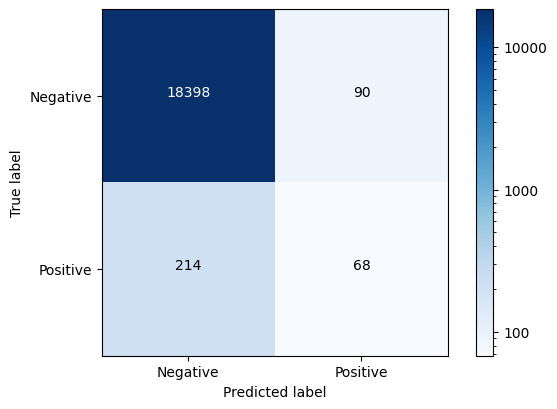

In [28]:
plot_confusion_matrix(y_test_GP, y_pred_GP, "img/results/Matrix_RF_GP.png")

In [29]:
print(metrics.confusion_matrix(y_test_GP,y_pred_GP))
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_GP,y_pred_GP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_GP,y_pred_GP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_GP,y_pred_GP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_GP,y_pred_GP),3)))

[[18398    90]
 [  214    68]]
Accuracy : 0.984
Precision : 0.43
Recall : 0.241
F1 : 0.309


In [30]:
y_train_GP_pred = rf_GoodPit.predict(X_train_GP)
training_error = 1 - accuracy_score(y_train_GP, y_train_GP_pred)
validation_error = 1 - accuracy_score(y_test_GP, y_pred_GP)

print ('Training error: ' + str(training_error))
print ('Validation error: ' + str(validation_error))

Training error: 0.0004338295734770403
Validation error: 0.01619605753862552


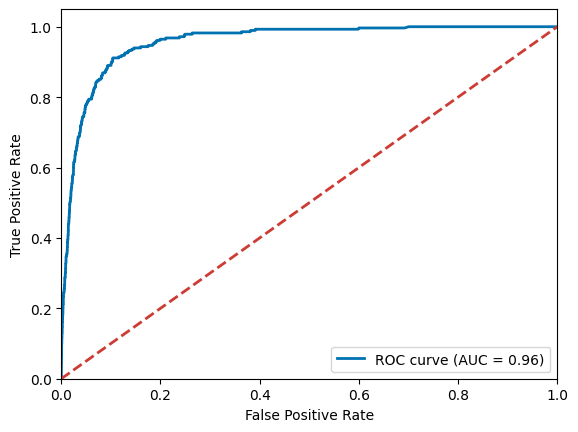

In [31]:
# Get the predicted probabilities for the positive class
y_scores_GP = rf_HasPit.predict_proba(X_test_GP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_GP, y_scores_GP, "img/results/ROC_RF_GP.png")

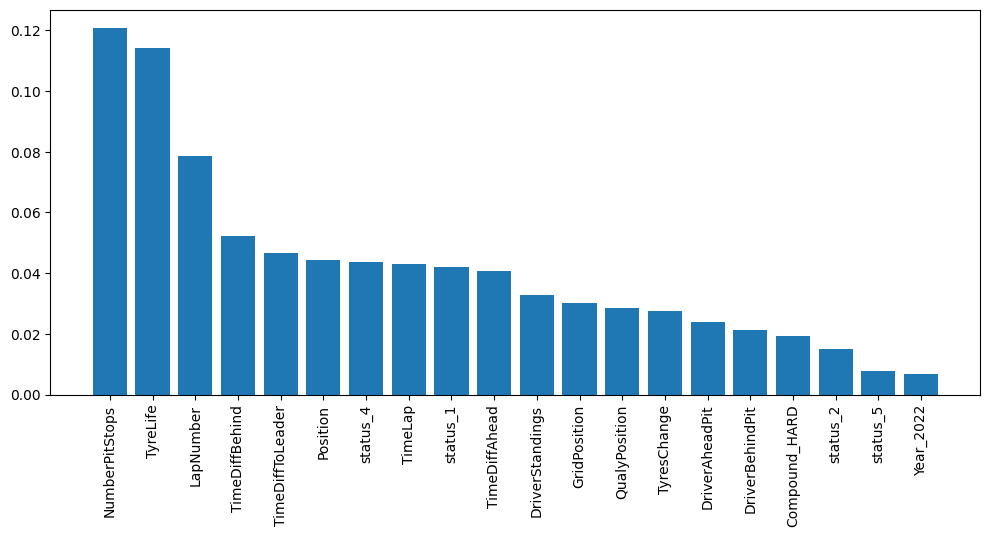

In [32]:
# Get feature importances
importances = rf_GoodPit.feature_importances_
indices = np.argsort(importances)[::-1]


# Set number of features to plot
num_features = 20

# Plot feature importances for the top num_features
plt.figure(figsize=(12, 5))
plt.bar(range(num_features), importances[indices][:num_features])
plt.xticks(range(num_features), X_train_HP.columns[indices][:num_features], rotation=90)
plt.savefig("img/results/topFeaturesGP", dpi=300 , bbox_inches='tight')
plt.show()

# SVM

### Has pit lap

In [33]:
svm_model_HP = svm.SVC(class_weight="balanced", C= 0.1, gamma=1 , kernel= 'poly')
svm_model_HP.fit(X_train_HP, y_train_HP)
y_pred_HP = svm_model_HP.predict(X_test_HP)

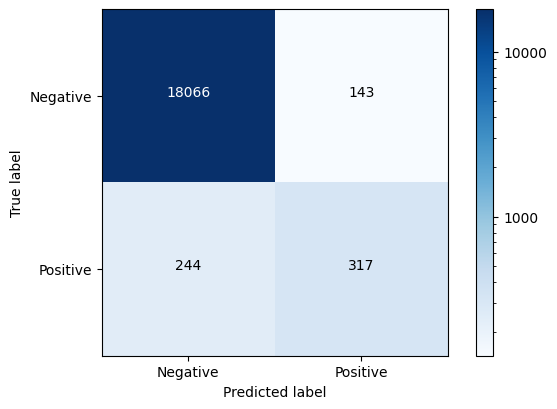

In [34]:
plot_confusion_matrix(y_test_HP, y_pred_HP, "img/results/SVM_RF_HP.png")

In [35]:
print(metrics.confusion_matrix(y_test_HP,y_pred_HP))
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_HP,y_pred_HP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_HP,y_pred_HP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_HP,y_pred_HP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_HP,y_pred_HP),3)))

[[18066   143]
 [  244   317]]
Accuracy : 0.979
Precision : 0.689
Recall : 0.565
F1 : 0.621


In [36]:
y_train_HP_pred = svm_model_HP.predict(X_train_HP)
training_error = 1 - accuracy_score(y_train_HP, y_train_HP_pred)
validation_error = 1 - accuracy_score(y_test_HP, y_pred_HP)

print ('Training error: ' + str(training_error))
print ('Validation error: ' + str(validation_error))

Training error: 0.00022833135446154174
Validation error: 0.020618007458710674


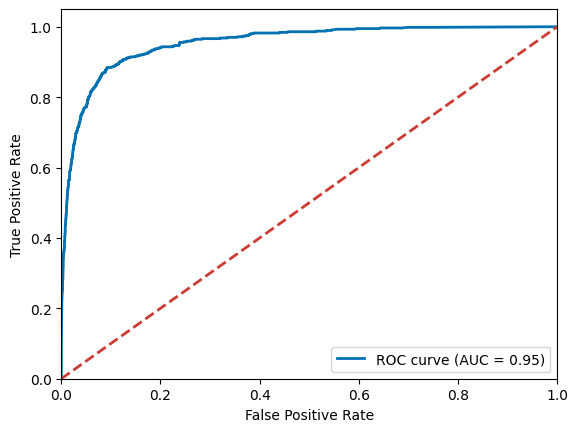

In [37]:
# Get the predicted probabilities for the positive class
y_scores_HP = rf_HasPit.predict_proba(X_test_HP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_HP, y_scores_HP, "img/results/SMV_RF_HP.png")

### Good pit lap

In [38]:
svm_model_GP = svm.SVC(class_weight="balanced",  C= 0.1, gamma=1 , kernel= 'poly')
svm_model_GP.fit(X_train_HP, y_train_HP)
y_pred_GP = svm_model_GP.predict(X_test_GP)

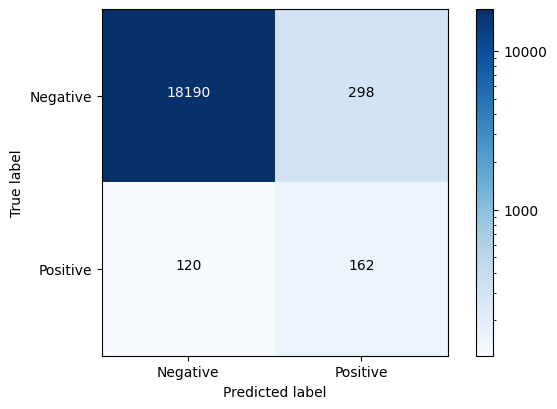

In [39]:
plot_confusion_matrix(y_test_GP, y_pred_GP, "img/results/Matrix_SVM_GP.png")

In [40]:
print(metrics.confusion_matrix(y_test_GP,y_pred_GP))
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test_GP,y_pred_GP),3)))
print( "Precision : " + str(np.round(metrics.precision_score(y_test_GP,y_pred_GP),3)))
print( "Recall : " + str(np.round(metrics.recall_score(y_test_GP,y_pred_GP),3)))
print( "F1 : " + str(np.round(metrics.f1_score(y_test_GP,y_pred_GP),3)))

[[18190   298]
 [  120   162]]
Accuracy : 0.978
Precision : 0.352
Recall : 0.574
F1 : 0.437


In [41]:
y_train_GP_pred = svm_model_GP.predict(X_train_GP)
training_error = 1 - accuracy_score(y_train_GP, y_train_GP_pred)
validation_error = 1 - accuracy_score(y_test_GP, y_pred_GP)

print ('Training error: ' + str(training_error))
print ('Validation error: ' + str(validation_error))

Training error: 0.013380217371449454
Validation error: 0.022269579115610005


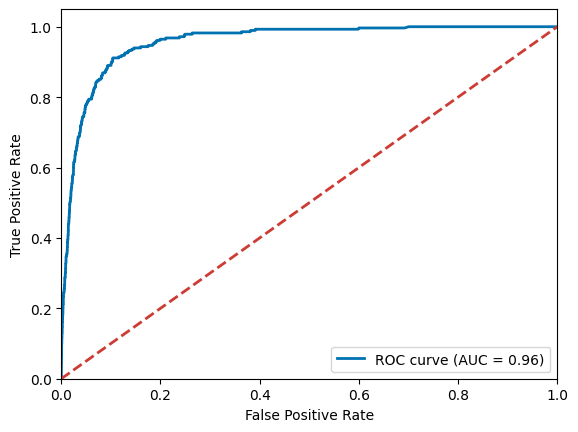

In [42]:
# Get the predicted probabilities for the positive class
y_scores_GP = rf_HasPit.predict_proba(X_test_GP)[:, 1]

# Plot the ROC curve
plot_roc_curve(y_test_GP, y_scores_GP, "img/results/ROC_SMV_GP.png")